In [1]:
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.linalg as LA
import quandl as ql
import pandas

In [2]:
size_of_picture = (640,640)

**Построим первую форму:**

In [3]:
form_1 = []
for i in range(size_of_picture[0]):
    form_1.append([0]*size_of_picture[1])
areas_of_colours_pic1 = []
for i in range(0,4):
    areas_of_colours_pic1.append([(0,size_of_picture[0]),(round(size_of_picture[0]/4)*i,round(size_of_picture[0]/4)*(i+1)),i*40+10])
for areas in areas_of_colours_pic1:
    for i in range(areas[0][0],areas[0][1]):
        for j in range(areas[1][0],areas[1][1]):
            form_1[i][j] = areas[2]

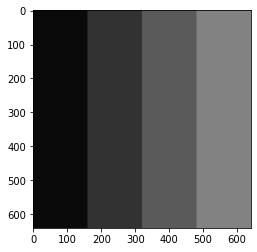

In [4]:
im = Image.fromarray(np.array(form_1))
imgplot = plt.imshow(im)

In [5]:
np.unique(form_1)

array([ 10,  50,  90, 130])

**Вторую:**

In [6]:
form_2 = []
for i in range(size_of_picture[0]):
    form_2.append([0]*size_of_picture[1])
areas_of_colours_pic2 = []
for i in range(0,2):
    areas_of_colours_pic2.append([(0,size_of_picture[0]),(round(size_of_picture[0]/4)*i,round(size_of_picture[0]/4)*(i+1)),i*30+10])
for i in range(1,4):
    areas_of_colours_pic2.append([(round(size_of_picture[0]/4)*i,round(size_of_picture[0]/4)*(i+1)),(round(size_of_picture[0]/2),size_of_picture[0]),i*50+10])
areas_of_colours_pic2.append([(0,round(size_of_picture[0]/2)),(0,round(size_of_picture[0]/4)),150])
for areas in areas_of_colours_pic2:
    for i in range(areas[0][0],areas[0][1]):
        for j in range(areas[1][0],areas[1][1]):
            form_2[i][j] = areas[2]

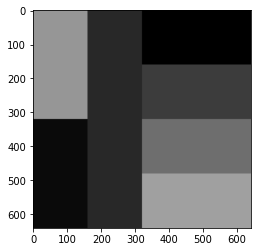

In [7]:
im = Image.fromarray(np.array(form_2))
imgplot = plt.imshow(im)

**Введем xi для 1 формы:**

In [8]:
xi_array_1 = []
colours = []
for i in range(len(areas_of_colours_pic1)):
    colours.append(areas_of_colours_pic1[i][2])
for colour in colours:
    xi = []    
    for i in range(size_of_picture[0]):
        xi.append([0]*size_of_picture[1])
    for i in range(0, size_of_picture[0]):
        for j in range(0, size_of_picture[1]):
            if form_1[i][j] == colour:
                xi[i][j] = 1
            else:
                xi[i][j] = 0
    xi_array_1.append(xi)

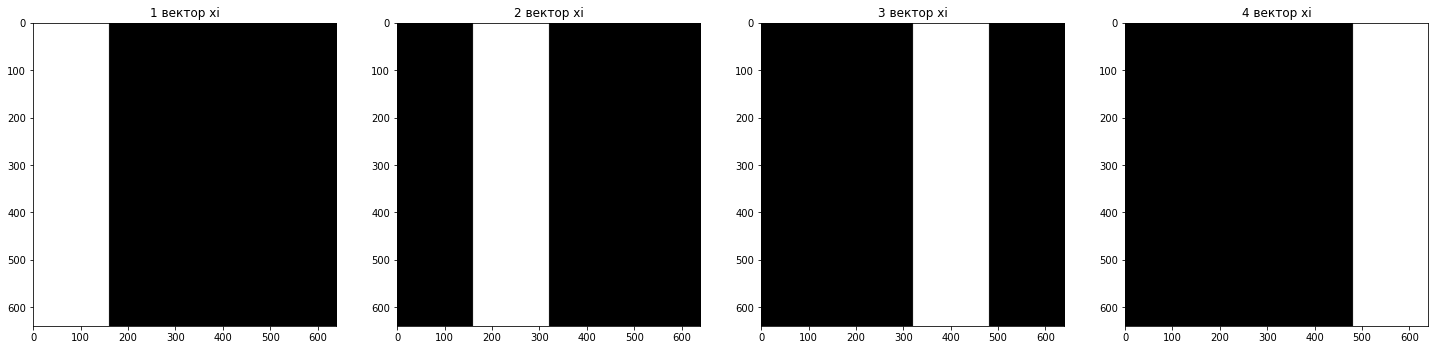

In [9]:
fig = plt.figure(figsize=(25, 18))
rows = 1
columns = len(xi_array_1)
for i in range(0, len(xi_array_1)):
    fig.add_subplot(rows, columns, i+1)
    xi_img = Image.fromarray((np.array(xi_array_1[i])*255).astype('uint8'), mode='P')
    imgplot = plt.imshow(xi_img)
    plt.title(f'{i+1} вектор xi')

**Для второй:**

In [10]:
xi = []
xi_array_2 = []
colours = [0]
for i in range(len(areas_of_colours_pic2)):
    colours.append(areas_of_colours_pic2[i][2])
for colour in colours:
    for i in range(size_of_picture[0]):
        xi.append([0]*size_of_picture[1])
    for i in range(0, size_of_picture[0]):
        for j in range(0, size_of_picture[1]):
            if form_2[i][j] == colour:
                xi[i][j] = 1
            else:
                xi[i][j] = 0
    xi_array_2.append(xi)
    xi = []

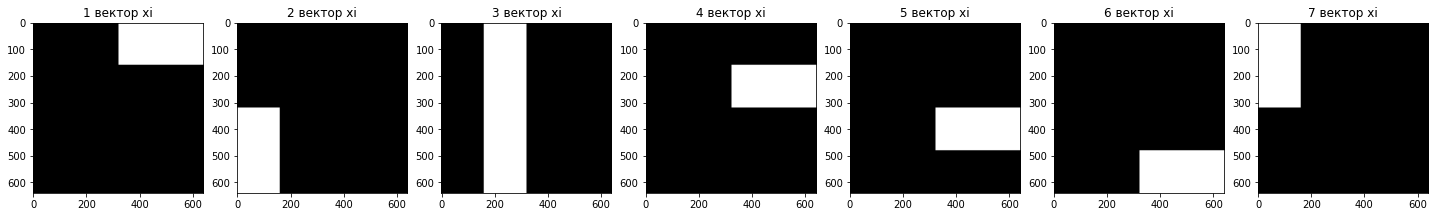

In [11]:
fig = plt.figure(figsize=(25, 18))
rows = 1
columns = len(xi_array_2)
for i in range(0, len(xi_array_2)):
    fig.add_subplot(rows, columns, i+1)
    xi_img = Image.fromarray((np.array(xi_array_2[i])*255).astype('uint8'), mode='P')
    imgplot = plt.imshow(xi_img)
    plt.title(f'{i+1} вектор xi')

**Вытянем все кси в столбцы и сформируем линейную оболочку V:**

In [12]:
v_basis_transparent = []
for xi in xi_array_1:
    xi_without_braces = sum(xi, [])
    v_basis_transparent.append(xi_without_braces)
for xi in xi_array_2:
    xi_without_braces = sum(xi, [])
    v_basis_transparent.append(xi_without_braces)

In [13]:
for i in range(0, 640):
    if v_basis_transparent[3][639 + i*640] != 1:
        print(i)

**Транспонируем матрицу:**

In [14]:
def transpose(matrix):
    a = []
    size_of_a = (len(matrix[0]), len(matrix))
    for i in range(size_of_a[0]):
        a.append([0]*size_of_a[1])
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            a[j][i] = matrix[i][j]
    return a

In [15]:
v_basis = transpose(v_basis_transparent)

In [16]:
for i in range(len(xi_array_1)):
    xi_array_1[i] = np.array(sum(xi_array_1[i],[]))
for i in range(len(xi_array_2)):
    xi_array_2[i] = np.array(sum(xi_array_2[i],[]))

**Определим функции перевода картинки в массив и обратно:**

In [17]:
def image_to_massive(list_img):
    return sum(list_img, [])
def back_to_the_image(list_img):
    K = size_of_picture[0]
    img_list_of_list = [list_img[i:i+K] for i in range(0, len(list_img), K)]
    return img_list_of_list

**Проведем экономичный SVD для V и найдем сингулярные векторы, соответствующие сингулярным значениям строго больше 0:**

In [18]:
Uhat, Shat, Vhat = np.linalg.svd(v_basis,full_matrices=False)

**Получим список сингулярных векторов, все левые сингулярные вектора находятся в матрице Uhat. Нам нужны левые, т.к. они имеют размерность m*1. Проверим сингулярные значения, они заданы в матрице Shat:** 

In [19]:
print(Shat)

[4.52548340e+02 3.91918359e+02 3.91918359e+02 3.20000000e+02
 2.26274170e+02 2.26274170e+02 2.26274170e+02 2.26274170e+02
 4.47713539e-11 3.71267259e-11 1.49421823e-13]


**Берем только те значения, у которых СЗ =/=0 :**

In [60]:
e_list = []
criterion = np.max(Shat)*0.000001
for i in range(len(Shat)):
    if float(Shat[i]) > criterion:
        e_list.append(Uhat[:,i])
e_list[2] = np.array(e_list[2])*(-1)

**Построим картинки сингулярных векторов:**

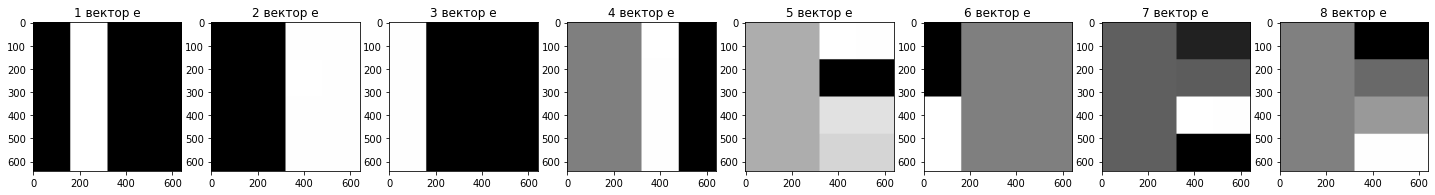

In [61]:
fig = plt.figure(figsize=(25, 18))
rows = 1
columns = len(e_list)
for i in range(0, len(e_list)):    
    e_list_arr = np.array(back_to_the_image((np.array(e_list[i])-np.min(e_list[i]))/(np.max(e_list[i])-np.min(e_list[i]))*255))
    fig.add_subplot(rows, columns, i+1)
    e_list_img = Image.fromarray(np.array(e_list_arr).astype('uint8'), mode='P')
    imgplot = plt.imshow(e_list_img)
    plt.title(f'{i+1} вектор e')

**Теперь возьмем произвольную картинку:**

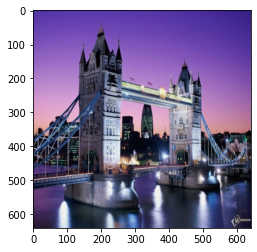

In [22]:
g_colored = Image.open('test3.jpg')
imgplot = plt.imshow(g_colored)

**Переведем картинку в 8 битную:**

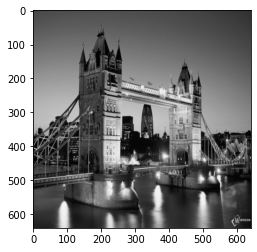

In [23]:
g = g_colored.convert('L')
g_as_arr = np.asarray(g,dtype='float64')
g_img = Image.fromarray(g_as_arr.astype('uint8'),mode='P')
imgplot = plt.imshow(g_img)

**Сделаем из картинки один массив и проверим на длину:**

In [24]:
g_as_arr_one_row = []
for row in g_as_arr:
    for element in row:
        g_as_arr_one_row.append(element)

**Найдем g перпендикулярное:**

In [25]:
g_perpendicular = g_as_arr_one_row
for e in e_list:
    e_np = np.array(e)
    coef = np.multiply(g_as_arr_one_row,e)
    coef = sum(coef)
    g_perpendicular -= coef*e_np

**Отобразим на экран получившееся изображение:**

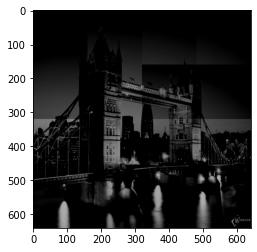

In [26]:
array_for_g_perp = np.array(back_to_the_image(g_perpendicular)).astype(int)
g_perpendicular_img = Image.fromarray(array_for_g_perp)
imgplot = plt.imshow(g_perpendicular_img)

**Как видим, по значениям яркости даже на глаз картинки не совпадают. Продолжим вычислять интересующее нас разложение:**

**Определим функции скалярного умножения и вычисления П1ei:**

In [27]:
def scalar(v1, v2):
    ans = np.multiply(v1, v2)
    ans = sum(ans)
    return ans

In [28]:
def p_1_e_i(e_i):
    p_1_e_i_sum = np.array([0.0]*size_of_picture[0]*size_of_picture[1])
    for j in range(0,len(xi_array_1)): 
        coef = scalar(e_i,xi_array_1[j])/scalar(xi_array_1[j],xi_array_1[j])
        p_1_e_i_sum += coef*xi_array_1[j]
    return p_1_e_i_sum

In [29]:
Pv1_matrix = []
criterion = 0.00000001
for i in range(0,len(e_list)):
    Pv1_matrix.append([0]*len(e_list))
for i in range(len(e_list)):
    for j in range(len(e_list)):
        Pv1_matrix[i][j] = scalar(p_1_e_i(e_list[i]),e_list[j])
        if abs(Pv1_matrix[i][j]) < criterion:
            Pv1_matrix[i][j] = 0

In [30]:
for rows in Pv1_matrix:
    print(rows)

[0.999999999999801, 0, 0, 0, 0, 0, 0, 0]
[0, 0.9999999999990685, 0, 0, 0, 0, 0, 0]
[0, 0, 1.0000000000012246, 0, 0, 0, 0, 0]
[0, 0, 0, 0.9999999999990685, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]


**Проверим необходимое условие проектора (P^2 = P):** 

In [31]:
criterion = 0.0000000001
if np.max(abs(np.array(Pv1_matrix).dot(np.array(Pv1_matrix)) - np.array(Pv1_matrix))) < criterion:
    print("Условие выполнено")
else:
    print("Условие не выполнено")

Условие выполнено


**Введем аналогичную функцию и найдем матрицу второго проектора:**

In [32]:
def p_2_e_i(e_i):
    p_2_e_i_sum = np.array([0.0]*size_of_picture[0]*size_of_picture[1])
    for j in range(len(xi_array_2)): 
        coef = scalar(e_i,xi_array_2[j])/scalar(xi_array_2[j],xi_array_2[j])
        p_2_e_i_sum += coef*xi_array_2[j]
    return p_2_e_i_sum

In [33]:
Pv2_matrix = []
criterion = 0.00000001
for i in range(0,len(e_list)):
    Pv2_matrix.append([0]*len(e_list))
for i in range(len(e_list)):
    for j in range(len(e_list)):
        Pv2_matrix[i][j] = scalar(p_2_e_i(e_list[i]),e_list[j])
        if abs(Pv2_matrix[i][j]) < criterion:
            Pv2_matrix[i][j] = 0

In [34]:
for rows in Pv2_matrix:
    print(rows)

[0.999999999999801, 0, 0, 0, 0, 0, 0, 0]
[0, 0.9999999999993749, 0, 0, 0, 0, 0, 0]
[0, 0, 0.9999999999992657, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0.9999999999982959, 0, 0, 0]
[0, 0, 0, 0, 0, 1.0000000000010425, 0, 0]
[0, 0, 0, 0, 0, 0, 1.0000000000031322, 0]
[0, 0, 0, 0, 0, 0, 0, 0.9999999999960788]


**Проверим необходимое условие и для второго проектора:**

In [35]:
criterion = 0.0000000001
if np.max(abs(np.array(Pv2_matrix).dot(np.array(Pv2_matrix)) - np.array(Pv2_matrix))) < criterion:
    print("Условие выполнено")
else:
    print("Условие не выполнено")

Условие выполнено


**Итак, получили 2 матрицы операторов Пv1 и Пv2. Займемся нахождением матрицы оператора П0. Для его нахождения вычтем П1 из П2, и у полученного оператора найдем все СВ, соответствующие СЗ=0:**

In [36]:
Pv1_matrix = np.array(Pv1_matrix)
Pv2_matrix = np.array(Pv2_matrix)
P_0_preparation_matrix = Pv2_matrix - Pv1_matrix 

**Находим СВ и СЗ матрицы:**

In [37]:
sz, sv = np.linalg.eig(P_0_preparation_matrix)
l0_vectors = []
criterion = max(sz)*0.000001
for i in range(len(sz)):
    if abs(sz[i]) < criterion:
        l0_vectors.append(sv[:,i])
print("Количество векторов в базисе L0:", len(l0_vectors))

Количество векторов в базисе L0: 3


In [38]:
l0_vectors

[array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.])]

**Разложим СВ по базису V:**

In [39]:
l0_vectors_img_size = []
for l0_vector in l0_vectors:
    l0_vector_img_size = [0]*size_of_picture[0]*size_of_picture[1]
    for i in range(0, len(l0_vector)):
        l0_vector_img_size += l0_vector[i]*np.array(e_list[i])
    l0_vectors_img_size.append(l0_vector_img_size)

**Как видим, имеется 3 СЗ == 0, и, следовательно, 3 СВ. Они и составляют базис в L0. Найдем g0 аналогично g перпендикулярному:**


In [40]:
g_0 = [0]*size_of_picture[0]*size_of_picture[1]
for l0_v in l0_vectors_img_size:
    l0_v_np = np.array(l0_v)
    coef = scalar(g_as_arr_one_row, l0_v_np)
    g_0 += coef*l0_v_np

**Построим картинки 3 базисных векторов в L0:**

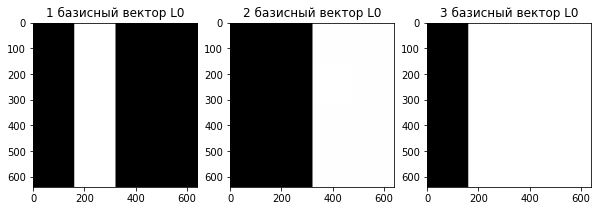

In [41]:
fig = plt.figure(figsize=(10,7))
rows = 1
columns = len(l0_vectors_img_size)
for i in range(0,len(l0_vectors_img_size)):
    l0_1_basis_v_arr = back_to_the_image((np.array(l0_vectors_img_size[i]-np.min(l0_vectors_img_size[i]))/(np.max(l0_vectors_img_size[i]-np.min(l0_vectors_img_size[i]))))*255)
    fig.add_subplot(rows, columns, i+1)
    l0_1_basis_v_img = Image.fromarray(np.array(l0_1_basis_v_arr).astype('uint8'), mode = 'P')
    imgplot = plt.imshow(l0_1_basis_v_img)
    plt.title(f'{i+1} базисный вектор L0')

**Построим картинку g0:**

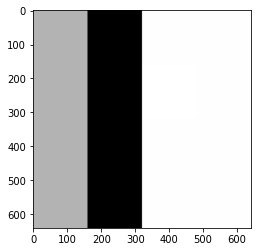

In [42]:
g0_img_size = back_to_the_image((np.array(g_0-np.min(g_0))/(np.max(g_0-np.min(g_0))))*255)
g_0_img = Image.fromarray(np.array(g0_img_size).astype('uint8'), mode = 'P')
imgplot = plt.imshow(g_0_img)

**Вычислим матрицу П0. Для этого сделаем из каждого собственного вектора матрицу и сложим их:**

In [43]:
def make_matrix(v1, v2):
    matrix = []
    for i in range(0, len(v1)):
        matrix.append([0]*(len(v2)))
    for i in range(0, len(v1)):
        for j in range(0, len(v2)):
            matrix[i][j] = v1[i]*v2[j]
    return matrix

In [44]:
P0_matrix = []
for i in range(0, len(l0_vectors[0])):
    P0_matrix.append([0.0]*len(l0_vectors[0]))
P0_matrix = np.array(P0_matrix)
for vector in l0_vectors:
    vector_matrix = make_matrix(vector, vector)
    P0_matrix += np.array(vector_matrix)

In [45]:
P0_matrix

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

**Теперь мы можем вычислить g1,0 и g2,0. Для этого найдем соответствующие операторы:**

In [46]:
P10_matrix = Pv1_matrix - P0_matrix
P20_matrix = Pv2_matrix - P0_matrix

**Построим базис в L10 и L20, используя их СВ, соответствующие СЗ = 1:**

In [47]:
sz, sv = np.linalg.eig(P10_matrix)
L10_basis_vectors = []
for i in range(0,len(sz)):
    if 0.99<sz[i]<1.01:
        L10_basis_vectors.append(sv[i])
print('Количество векторов в базисе L10: ', len(L10_basis_vectors))

Количество векторов в базисе L10:  1


In [48]:
sz, sv = np.linalg.eig(P20_matrix)
L20_basis_vectors = []
for i in range(0,len(sz)):
    if 0.99<sz[i]<1.01:
        L20_basis_vectors.append(sv[i])
print('Количество векторов в базисе L20: ', len(L20_basis_vectors))

Количество векторов в базисе L20:  4


**Найдем разложение g10 и g20 по базисным векторам L10 и L20 соответственно. Для этого необходимо найти коэффициенты разложения, решив СЛАУ относительно коэффициентов alpha и beta.**

**Разложим базисные векторы по базису пространства V:**

In [49]:
L10_and_L20_basis = L10_basis_vectors+L20_basis_vectors
L10_and_L20_basis_img_size = []
for basis_vector in L10_and_L20_basis:
    vec = np.zeros(size_of_picture[0]*size_of_picture[1])
    for i in range(0, len(basis_vector)):
        vec += basis_vector[i]*np.array(e_list[i])
    L10_and_L20_basis_img_size.append(vec)

**Построим матрицу Грама:**

In [50]:
M = []
for i in range(0, len(L10_and_L20_basis_img_size)):
    M_row = []
    for j in range(0, len(L10_and_L20_basis_img_size)):
        M_row.append(scalar(L10_and_L20_basis_img_size[i],L10_and_L20_basis_img_size[j]))
    M.append(M_row)

**Построим вектор решений для СЛАУ. Для начала найдем g10+g20:**

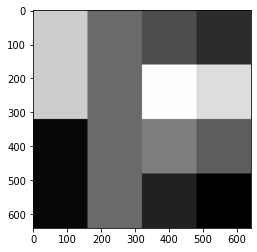

In [51]:
g10_plus_g20_arr = g_as_arr_one_row - g_0 - g_perpendicular
g10_plus_g20 = np.array(back_to_the_image((np.array(g10_plus_g20_arr)-np.min(g10_plus_g20_arr))/(np.max(g10_plus_g20_arr)-np.min(g10_plus_g20_arr))*255))
g10_plus_g20_img = Image.fromarray(np.array(g10_plus_g20).astype('uint8'), mode='P')
imgplot = plt.imshow(g10_plus_g20_img)

**Найдем столбец решений для СЛАУ:**

In [52]:
v = []
for bas_vect in L10_and_L20_basis_img_size:
    v.append(scalar(g10_plus_g20_arr, bas_vect))

**Получим коэффициенты разложения g10 и g20:**

In [53]:
coefficients = np.linalg.solve(M, v)

In [54]:
alpha_list = coefficients[:len(L10_basis_vectors)]
beta_list = coefficients[len(L10_basis_vectors):len(L20_basis_vectors)+1]

**Получим g10 и g20:**

In [55]:
g10 = np.zeros(size_of_picture[0]*size_of_picture[1])
for i in range(0, len(L10_basis_vectors)):
    g10 += alpha_list[i]*np.array(L10_and_L20_basis_img_size[i])

In [56]:
g20 = np.zeros(size_of_picture[0]*size_of_picture[1])
for i in range(len(L10_basis_vectors), len(L10_and_L20_basis)):
    g20 += beta_list[i-len(L10_basis_vectors)]*np.array(L10_and_L20_basis_img_size[i])

**Построим g10 и g20:**

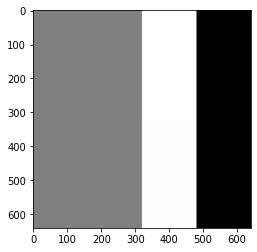

In [57]:
g10_arr = back_to_the_image((np.array(g10)-np.min(g10))/(np.max(g10-np.min(g10)))*255)
g10_img = Image.fromarray(np.array(g10_arr).astype('uint8'), mode = 'P')
imgplot = plt.imshow(g10_img)

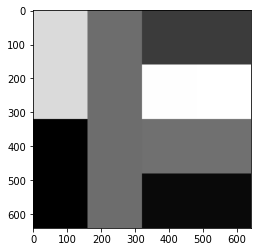

In [58]:
g20_arr = back_to_the_image((np.array(g20)-np.min(g20))/(np.max(g20-np.min(g20)))*255)
g20_img = Image.fromarray(np.array(g20_arr).astype('uint8'), mode = 'P')
imgplot = plt.imshow(g20_img)

**Построим g из суммы изображений g10, g20, g0 и g перпендикулярного:**

Text(0.5, 1.0, 'Исходное изображение')

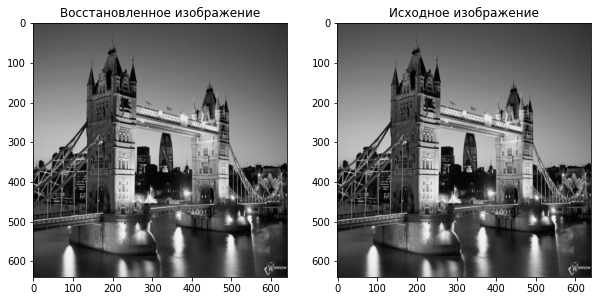

In [59]:
fig = plt.figure(figsize=(10,7))
rows = 1
columns = 2
g_restored = g_perpendicular+g_0+g10+g20
g_restored_arr = back_to_the_image(np.array(g_restored))
fig.add_subplot(rows,columns, 1)
g_restored_img = Image.fromarray(np.array(g_restored_arr).astype('uint8'), mode='P')
imgplot = plt.imshow(g_restored_img)
plt.title('Восстановленное изображение')
fig.add_subplot(rows,columns, 2)
plt.imshow(g_img)
plt.title('Исходное изображение')